In [322]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from IPython.core.interactiveshell import InteractiveShell

import os
import warnings
import numpy as np
import pandas as pd

In [323]:
warnings.filterwarnings(action='ignore')
InteractiveShell.ast_node_interactivity = "all"

In [324]:
input_dir = '../Database/'
file = 'train.csv'
data = pd.read_csv(os.path.join(input_dir, file))
data['년'] = data['일시'].str.slice(0, 4)
data['월'] = data['일시'].str.slice(5, 7)
data['월일'] = data['일시'].str.slice(5)

In [325]:
train = pd.read_csv('../Database/PCA_data.csv')
test_input = train.iloc[-365:-5, 1]
test_input.index = train['일시'].iloc[-365:-5]
train.pop('일시')

0        1960-01-01
1        1960-01-02
2        1960-01-03
3        1960-01-04
4        1960-01-05
            ...    
23006    2022-12-27
23007    2022-12-28
23008    2022-12-29
23009    2022-12-30
23010    2022-12-31
Name: 일시, Length: 23011, dtype: object

In [326]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
train['평균기온'] = scaler.fit_transform(train['평균기온'].values.reshape(-1, 1))
train['평균기온']

0       -1.336165
1       -1.364766
2       -0.802287
3       -0.468613
4       -1.622171
           ...   
23006   -1.431500
23007   -1.498235
23008   -1.460101
23009   -1.355232
23010   -1.298031
Name: 평균기온, Length: 23011, dtype: float64

<Axes: >

Text(0.5, 0.98, 'Train Data')

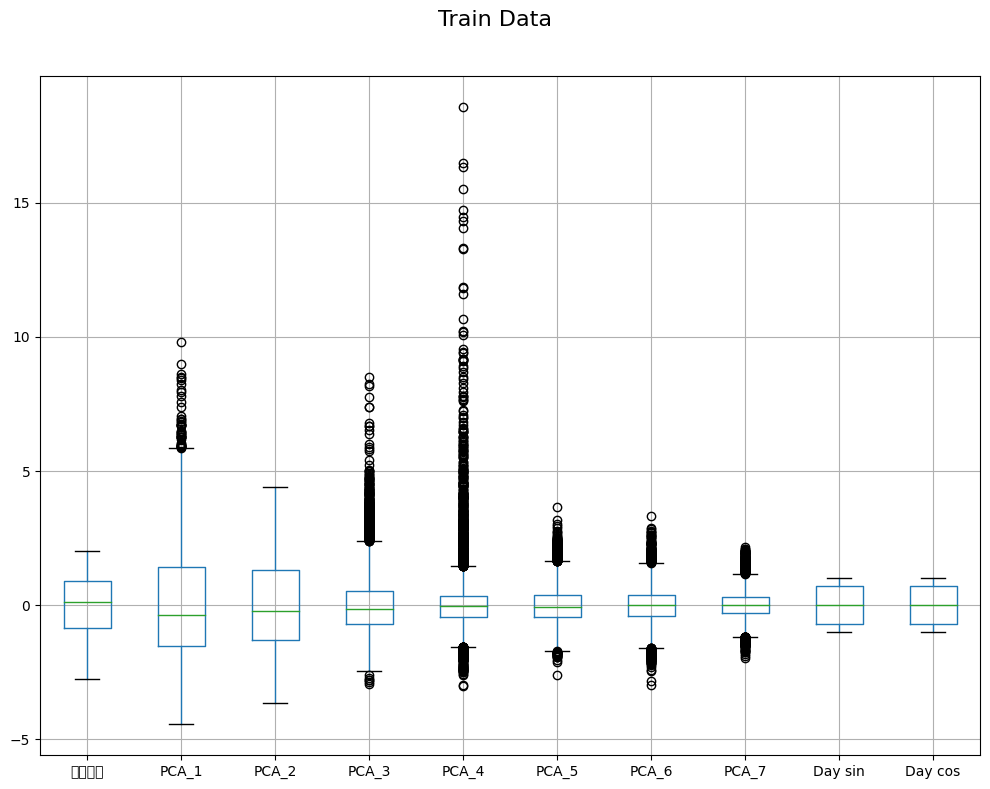

In [327]:
fig, ax = plt.subplots(figsize=(10, 8))
train.boxplot(ax=ax)
fig.suptitle('Train Data', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
fig.show()

In [328]:
benchmark = data['평균기온'][data['년'] == '2022']
benchmark = pd.DataFrame(benchmark.iloc[:358])
benchmark.reset_index(inplace=True)
benchmark.pop('index')

0      22646
1      22647
2      22648
3      22649
4      22650
       ...  
353    22999
354    23000
355    23001
356    23002
357    23003
Name: index, Length: 358, dtype: int64

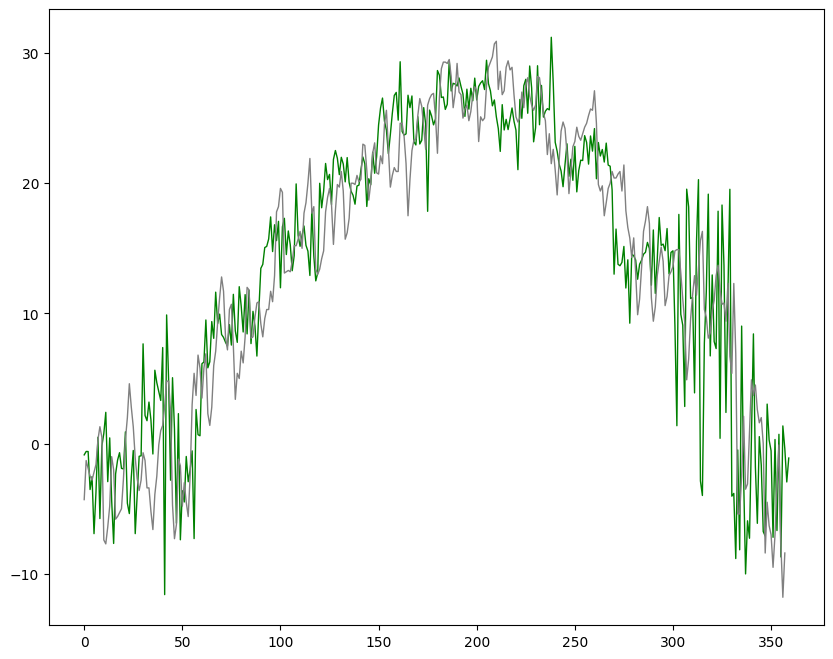

In [329]:
temperature = pd.DataFrame(data['평균기온']).iloc[-360:].values
monthly_temperature = np.split(temperature, 12)

def generalized_wiener_process(a, b):
    ad = 1 / 4
    forecast = np.random.normal(a, (b ** 2) * ad, 30)
    return forecast

forecasted = []

for i in range(len(monthly_temperature)):
    a = np.mean(monthly_temperature[i])
    b = np.std(monthly_temperature[i])
    forecasted.append(generalized_wiener_process(a, b))

forecast_temperature = pd.DataFrame(np.concatenate(forecasted))

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(forecast_temperature, color="green", linewidth="1", label="bi_LSTM")
ax.plot(benchmark, color="grey", linewidth="1", label="2022")

In [330]:
sub1 = pd.read_csv('../Files/bi_LSTM.csv')
sub2 = pd.read_csv('../Files/bi_LSTM_GRU.csv')
sub3 = pd.read_csv('../Files/LSTM.csv')
sub4 = pd.read_csv('../Files/LSTM_GRU.csv')

Text(0.5, 0.98, 'avg_Temperature')

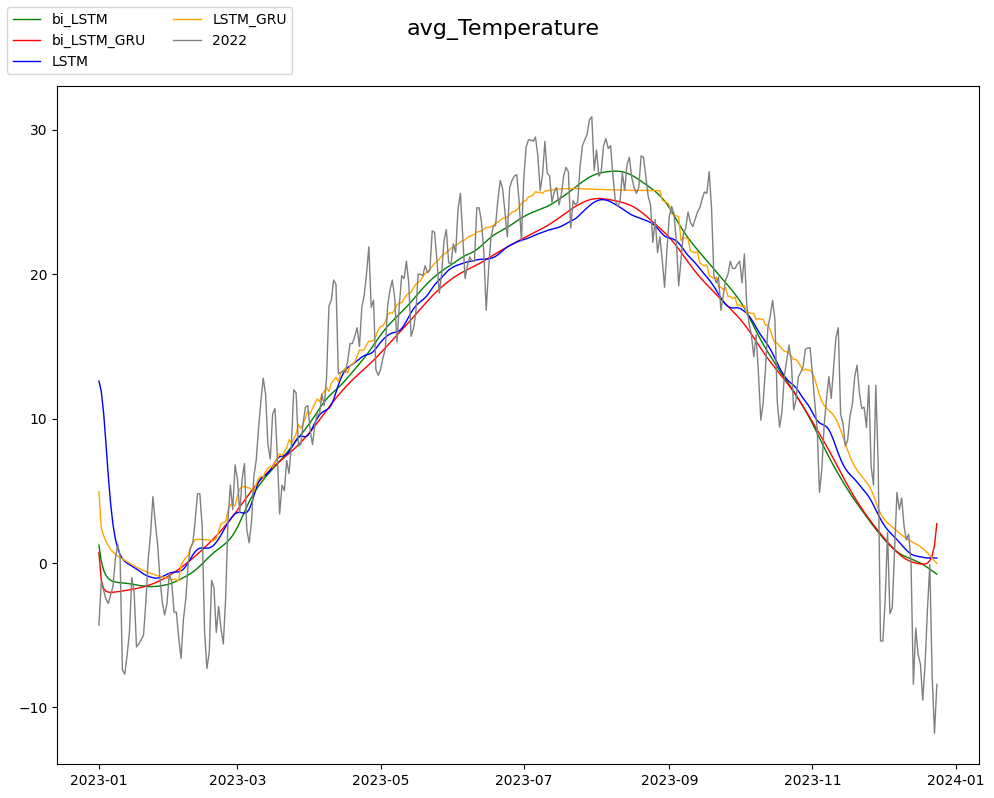

In [331]:
date_time = pd.to_datetime(sub1['Date'], format='%Y-%m-%d')
X = date_time
Y1 = sub1['avg_Temperature']
Y2 = sub2['avg_Temperature']
Y3 = sub3['avg_Temperature']
Y4 = sub4['avg_Temperature']

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, Y1, color="green", linewidth="1", label="bi_LSTM")
ax.plot(X, Y2, color="red", linewidth="1", label="bi_LSTM_GRU")
ax.plot(X, Y3, color="blue", linewidth='1', label="LSTM")
ax.plot(X, Y4, color="orange", linewidth='1', label="LSTM_GRU")
ax.plot(X, benchmark, color="grey", linewidth='1', label="2022")


fig.suptitle('avg_Temperature', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
fig.legend(loc="upper left", ncol=2)
fig.show()

Text(0.5, 0.98, 'avg_Temperature')

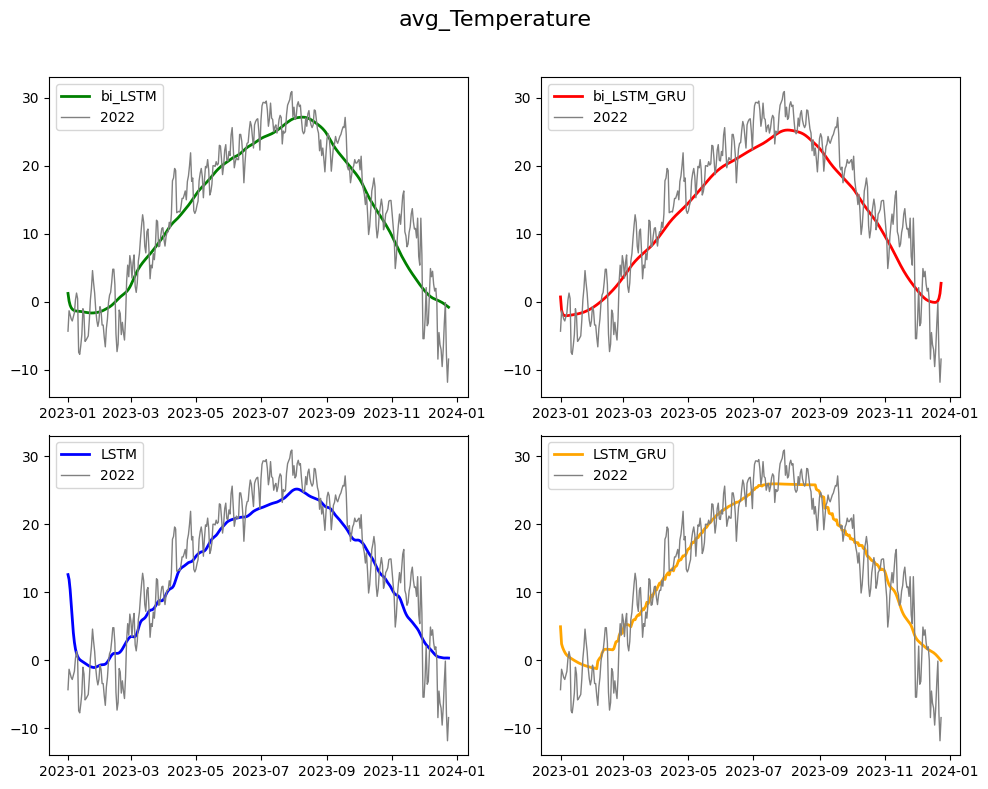

In [332]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(X, Y1, color="green", linewidth="2", label="bi_LSTM")
axs[0, 0].plot(X, benchmark, color="grey", linewidth="1", label="2022")
axs[0, 0].legend(loc="upper left")

axs[0, 1].plot(X, Y2, color="red", linewidth="2", label="bi_LSTM_GRU")
axs[0, 1].plot(X, benchmark, color="grey", linewidth="1", label="2022")
axs[0, 1].legend(loc="upper left")

axs[1, 0].plot(X, Y3, color="blue", linewidth="2", label="LSTM")
axs[1, 0].plot(X, benchmark, color="grey", linewidth="1", label="2022")
axs[1, 0].legend(loc="upper left")

axs[1, 1].plot(X, Y4, color="orange", linewidth="2", label="LSTM_GRU")
axs[1, 1].plot(X, benchmark, color="grey", linewidth="1", label="2022")
axs[1, 1].legend(loc="upper left")

fig.suptitle('avg_Temperature', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])

fig.show()

Text(0.5, 0.98, 'GARCH_Temperature')

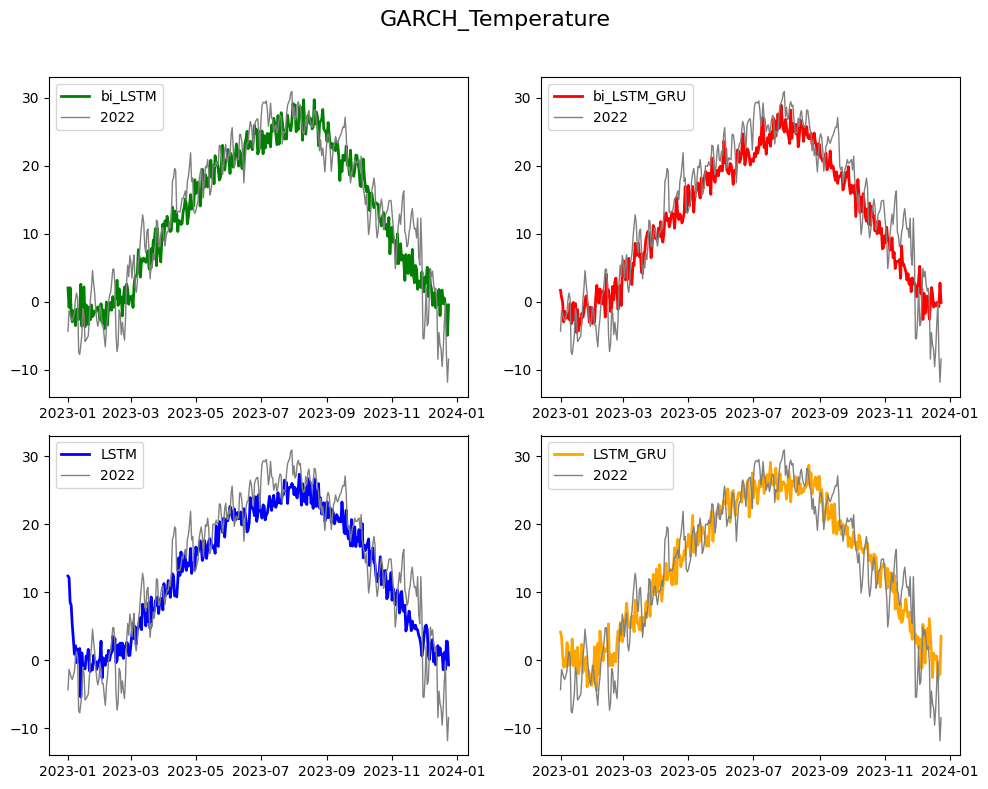

In [333]:
Z1 = sub1['GARCH_Temperature']
Z2 = sub2['GARCH_Temperature']
Z3 = sub3['GARCH_Temperature']
Z4 = sub4['GARCH_Temperature']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(X, Z1, color="green", linewidth="2", label="bi_LSTM")
axs[0, 0].plot(X, benchmark, color="grey", linewidth="1", label="2022")
axs[0, 0].legend(loc="upper left")

axs[0, 1].plot(X, Z2, color="red", linewidth="2", label="bi_LSTM_GRU")
axs[0, 1].plot(X, benchmark, color="grey", linewidth="1", label="2022")
axs[0, 1].legend(loc="upper left")

axs[1, 0].plot(X, Z3, color="blue", linewidth="2", label="LSTM")
axs[1, 0].plot(X, benchmark, color="grey", linewidth="1", label="2022")
axs[1, 0].legend(loc="upper left")

axs[1, 1].plot(X, Z4, color="orange", linewidth="2", label="LSTM_GRU")
axs[1, 1].plot(X, benchmark, color="grey", linewidth="1", label="2022")
axs[1, 1].legend(loc="upper left")

fig.suptitle('GARCH_Temperature', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])

fig.show()

Text(0.5, 0.98, 'Wiener_Temperature')

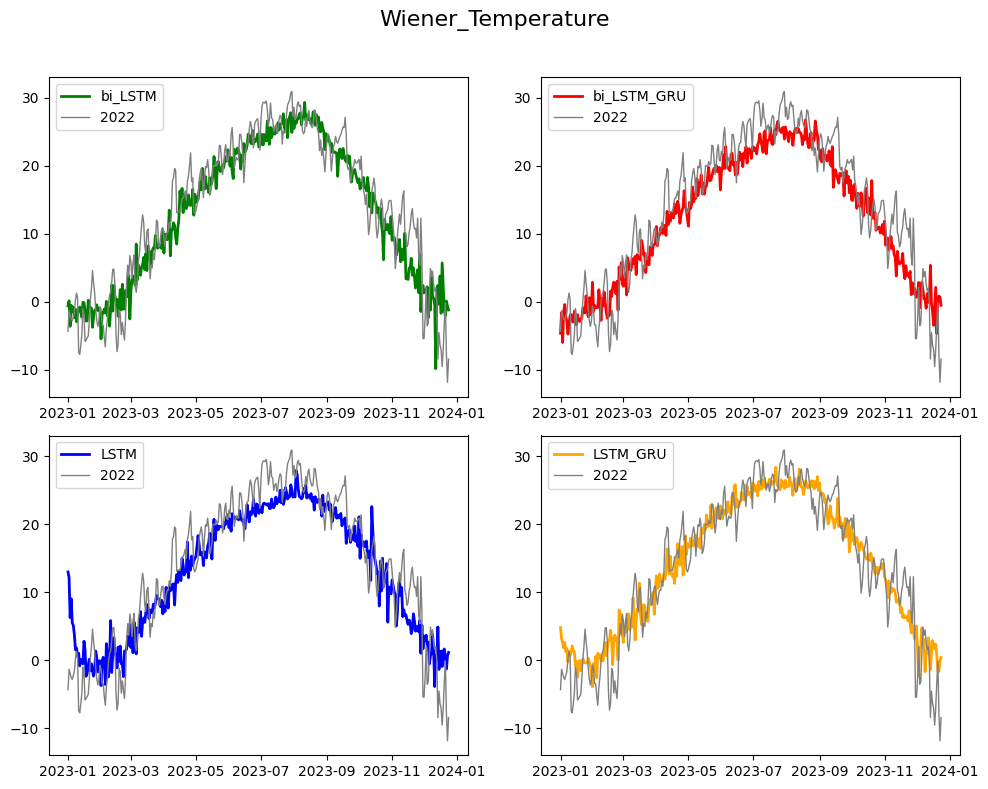

In [334]:
W1 = sub1['Wiener_Temperature']
W2 = sub2['Wiener_Temperature']
W3 = sub3['Wiener_Temperature']
W4 = sub4['Wiener_Temperature']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(X, W1, color="green", linewidth="2", label="bi_LSTM")
axs[0, 0].plot(X, benchmark, color="grey", linewidth="1", label="2022")
axs[0, 0].legend(loc="upper left")

axs[0, 1].plot(X, W2, color="red", linewidth="2", label="bi_LSTM_GRU")
axs[0, 1].plot(X, benchmark, color="grey", linewidth="1", label="2022")
axs[0, 1].legend(loc="upper left")

axs[1, 0].plot(X, W3, color="blue", linewidth="2", label="LSTM")
axs[1, 0].plot(X, benchmark, color="grey", linewidth="1", label="2022")
axs[1, 0].legend(loc="upper left")

axs[1, 1].plot(X, W4, color="orange", linewidth="2", label="LSTM_GRU")
axs[1, 1].plot(X, benchmark, color="grey", linewidth="1", label="2022")
axs[1, 1].legend(loc="upper left")

fig.suptitle('Wiener_Temperature', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])

fig.show()